In [92]:
%load_ext autoreload 
%autoreload 2 
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import GridSearchCV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
df = pd.read_csv('dataset-rental-ads.csv')
m, n = df.shape
print("Num starting values: (%d)" % m)

Num starting values: (49352)


<h4>First, have a look at the data types. Anything that isn't as described will have anomylous values</h4>
<ul>
<li>
listing_id          a unique number to identify this advert 
</li>
<li>


created_year        the year the advert was created
</li>
<li>

created_month       the month the advert was created (4 = April, 5 = May and 
</li>
<li>
                    6 = June)
created_day         the day of the month the advert was created (1-31)
</li>
<li>
created_hour        the hour of the day the advert was created (0-23)
</li>
<li>
latitude            obvious
</li>
<li>
longitude           obvious
</li>
<li>
price               the rent N.B. this is not the dependent variable
</li>
<li>
bathrooms           obvious (but note that halves are allowed!)
</li>
<li>
bedrooms            obvious (this time integers only)
</li>
<li>
description_length  the number of characters there were in a free-text 
</li>
<li>
                    description of the accommodation
num_photos          the number of photos that the advert contained
</li>
<li>
highlights_str      a string that contains a comma-separated list of some 
</li>
<li>
                    highlights of the accommodation
keywords_str        a string of the top-20 comma-separated keywords that I 
                    extracted from the highlights_str using the kinds of 
</li>
<li>
                    techniques you may have studied in Information Retrieval
interest_level      'low', 'medium', 'high' - this is the dependent variable
</li>
</ul>

In [49]:
df.describe(include='all')

,listing_id,created_year,created_month,created_day,created_hour,latitude,longitude,price,bathrooms,bedrooms,description_length,num_photos,highlights_str,keywords_str,interest_level
count,4.935200e+04,49352.0,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,4.935200e+04,49352.00000,49352.000000,49352.000000,49352.000000,46134,45467,49352
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10253,2127,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pre-War,Dogs Allowed,Cats Allowed","dogs,allowed,cats",low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400,2045,34284
mean,7.024055e+06,2016.0,5.014852,15.206881,4.764690,40.741545,-73.955716,3.830174e+03,1.21218,1.541640,601.975624,5.606946,NaN,NaN,NaN
std,1.262746e+05,0.0,0.824442,8.280749,4.190298,0.638535,1.177912,2.206687e+04,0.50142,1.115018,393.592337,3.632283,NaN,NaN,NaN
min,6.811957e+06,2016.0,4.000000,1.000000,0.000000,0.000000,-118.271000,4.300000e+01,0.00000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,6.915888e+06,2016.0,4.000000,8.000000,2.000000,40.728300,-73.991700,2.500000e+03,1.00000,1.000000,340.000000,4.000000,NaN,NaN,NaN
50%,7.021070e+06,2016.0,5.000000,15.000000,3.000000,40.751800,-73.977900,3.150000e+03,1.00000,1.000000,564.000000,5.000000,NaN,NaN,NaN
75%,7.128733e+06,2016.0,6.000000,22.000000,5.000000,40.774300,-73.954800,4.100000e+03,1.00000,2.000000,809.000000,7.000000,NaN,NaN,NaN


<p>
Immediately we can see the following columns must be looked at as they do not have the correct amount of entries
</p>


<ul>
<li>
highlights_str
</li>
<li>
keywords_str
</li>
</ul>

<p>
We can also see that, from our data, only one year is recorded for each of the records. 2016. we can delete this colun after a quick check to verify.
</p>



In [50]:
df['created_year'].unique()

array([2016])

<p>
This column is, in fact useless and we can delete it now. Along with 
</p>

In [51]:
df.drop('created_year', axis=1, inplace = True)
df.drop('listing_id', axis=1, inplace = True)

<p>
to determine what else must be looked at, we will see the unique values of some of the columns. 
</p>

In [52]:
for column in df.columns[1:]:
    print(column, "=",len(df[column].unique()), "unique values." )
    print(df[column].unique())
    print("------------------------")

created_day = 31 unique values.
[24 12 17 18 28 19 27 13 20  2 14  3  9  1 22  7 25 21 26  4  6 29 11 30  8
 23 15 10 16  5 31]
------------------------
created_hour = 24 unique values.
[ 7 12  3  2  1  4  6  5 21 15 11 17 14 20  8 22  0 18 13 16 10 19 23  9]
------------------------
latitude = 2335 unique values.
[ 40.7145  40.7947  40.7388 ...,  40.7038  40.6566  40.6211]
------------------------
longitude = 1677 unique values.
[-73.9425 -73.9667 -74.0018 ..., -74.0348 -73.8144 -74.0357]
------------------------
price = 2808 unique values.
[ 3000  5465  2850 ...,  3527  2727 10650]
------------------------
bathrooms = 15 unique values.
[  1.5   1.    2.    3.5   3.    2.5   0.    4.    4.5  10.    5.    6.
   6.5   5.5   7. ]
------------------------
bedrooms = 9 unique values.
[3 2 1 4 0 5 6 7 8]
------------------------
description_length = 2096 unique values.
[ 588    8  691 ..., 1648 1532 2153]
------------------------
num_photos = 45 unique values.
[ 5 11  8  3 10  9  1  4  6  2

<h3>Some notes at this point</h3>

<p>The following columns I would think to be fine</p>

<ul>
<li>
created_day
</li>
<li>
created_hour
</li>
</ul>

<p>
We will plot the following against one another to try and root out anomylous values....
</p>
<ul>
<li>
latitude against longitude. Make sure the houses are actually in the city. This should appear as a cluster.
</li>
<li>
Price vs bedrooms
</li>
<li>
Price vs bathrooms
</li>
</ul>

In [53]:
def plot(col1, col2, title, colour):
    x = df[col1].values
    y = df[col2].values

    fig = plt.figure()
    plt.title(title)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.scatter(x, y, color = colour)
    plt.show()

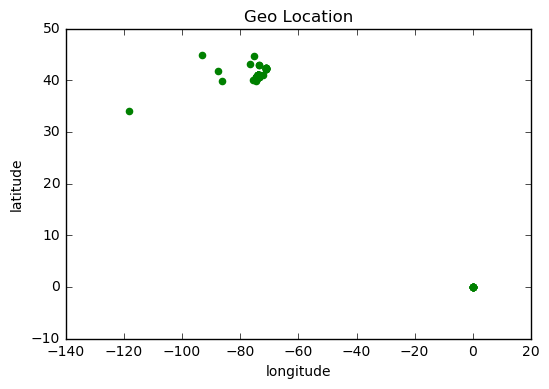

In [54]:
plot('longitude', 'latitude', 'Geo Location', 'green')

<p>As we can see, in all three of the above plots, there are at least three data entires in which there is 
anomylous data. this being said, if there is a mutual exclusion between the data we can ipute means. If not, we will simply delete the items. 
</p>

<p>From the use of the map at http://www.latlong.net/Show-Latitude-Longitude.html, we can see that the bounds for both the longitude and latitude for New york city is as follows</p>

<ul>
<li>
Latitude : 41 - 40.5
</li>
<li>
Longitude : (-71.79) - (-74.26)
</li>
</ul>

<p>with the north, south, east and west borders being limited to MT Vernon, Perth Amboy, the eastern extent of long island and Perth amboy again. In accordance to the Google maps outline of the new York City area.</p>

In [55]:
anomalies = df[(df['longitude'] <= (-74.26)) | (df['longitude'] >= (-71.79)) | \
               (df['latitude'] >= 41) | (df['latitude'] <= 40.5)].shape[0]
print(anomalies)

45


<p>this means that there are a total of 45 houses that are outside the borders of New York city. These could either be 
incorrectly input or just simply added to the dataset by accident.
Either way, I a going to delete this data as it is a sufficiently small portion of the data.
</p>

In [56]:
df = (df[(df['longitude'] >= (-74.26)) & (df['longitude'] <= (-71.79)) & \
         (df['latitude'] <= 41) & (df['latitude'] >= 40.5)]).copy()
df.reset_index(drop=True, inplace=True)

# Check the anomalies were filtered out
print(m - df.shape[0] == anomalies)
m = df.shape[0]

True


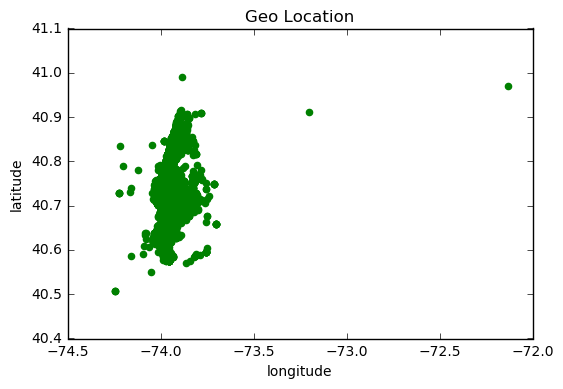

49307


In [57]:
# One final check....
plot('longitude', 'latitude', 'Geo Location', 'green')
print(m)

<p>We can see that the above data still includes a value that may cause problems on the eastern extent of long island it is still however technically in New York. We will leave it in for now.</p>

</p>Now on to the prices....</p>


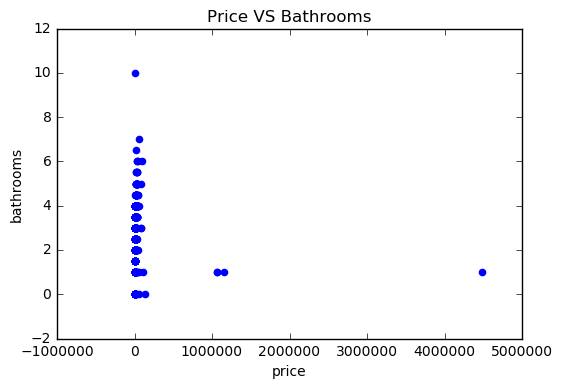

In [58]:
plot('price','bathrooms',"Price VS Bathrooms",'blue')

<p>we can immediately see some anomylous values.. or are they? Further investigation is needed</p>

In [59]:
df[df['price'] > 500000]

,created_month,created_day,created_hour,latitude,longitude,price,bathrooms,bedrooms,description_length,num_photos,highlights_str,keywords_str,interest_level
9581,6,24,5,40.8011,-73.9480,1150000,1.0,2,0,0,"Doorman,Elevator,Cats Allowed,Dogs Allowed,Exc...","dogs,allowed,cats,elevator,doorman",low
19541,6,24,5,40.7299,-74.0071,4490000,1.0,2,0,0,"Doorman,Elevator,Cats Allowed,Dogs Allowed,Exc...","dogs,allowed,cats,elevator,doorman",low
29639,5,14,5,40.7676,-73.9844,1070000,1.0,1,8,0,"Doorman,Cats Allowed,Dogs Allowed","dogs,allowed,cats,doorman",low
30662,5,19,2,40.7676,-73.9844,1070000,1.0,1,1035,7,"Doorman,Elevator,Pre-War,Dogs Allowed,Cats All...","war,pre,dogs,allowed,cats,elevator,doorman",low


<p>I have investigated the area and type of building found for each of the above listings. here are my findings;</p>

<p>I used the following website to determine the average rent by area in New York as I am not familiar with the percieved wealth of an area off hand. </p>
<p>
https://hotpads.com/columbus-circle-new-york-ny/apartments-for-rent?orderBy=highPrice
</p>

<ul>
<li>
ID:9581 - Found in harlem, standard accomodation verdict: ANOMYLOUS
</li>
<li>
ID:19541 - Found in Grenwich, standard accomodation verdict: ANOMYLOUS
</li>
<li>
ID:29639 - Found in Columbus circle, High rise verdict: Likely ANOMYLOUS
</li>
<li>
ID:30662 - Found in Columbus circle, High rise verdict: Likely repeated appartent. ANOMYLOUS
</li>
</ul>

<p>I am going to delete the above data as there is a high likelihood that there is either a mistype or otherwise. I will, for now, delete the data as there is such a small amount</p>

In [60]:
anomalies = df[df['price'] > 500000].shape[0]

df = (df[df['price'] < 500000]).copy()
df.reset_index(drop=True, inplace=True)

# Check the anomalies were filtered out
print(m - df.shape[0] == anomalies)

True


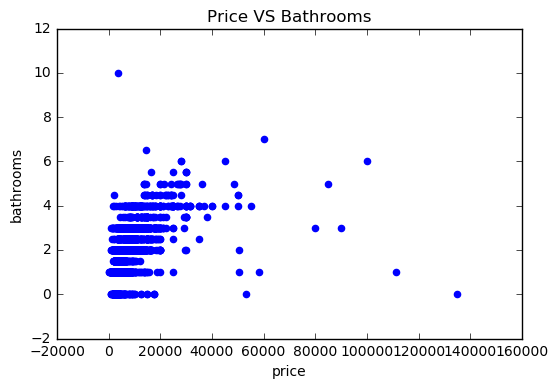

In [61]:
plot('price','bathrooms',"Price VS Bathrooms",'blue')

<p>To me, this still doesn't look amazing. There are still a  few values I would like to have a look at</p>

In [62]:
df[(df['bathrooms'] > 6)]

,created_month,created_day,created_hour,latitude,longitude,price,bathrooms,bedrooms,description_length,num_photos,highlights_str,keywords_str,interest_level
1989,4,9,4,40.7633,-73.9849,3600,10.0,2,757,5,"Doorman,Elevator,Fitness Center,Laundry in Bui...","building,laundry,dogs,allowed,cats,center,fitn...",low
17029,6,22,3,40.8336,-74.2160,14500,6.5,7,1729,32,"Garage,Garden,Doorman",doorman,low
42528,4,7,17,40.7335,-73.9974,60000,7.0,5,1361,8,NaN,NaN,low


<ul>
<li>
ID: 1989 - 2 bed, 10 bath with rich data. Mistype. I will change bathrooms to 1
</li>
<li>
ID: 17029 - 7 bed, 6.5 bath with rich other data. unusual but not anommylous.
</li>
<li>
ID: 42528 - 5 bed, 7 bath with 60000 rent in a row with little else data. Delete
</li>

In [63]:
df.drop(42528, inplace=True)
df.reset_index(drop=True, inplace=True)

<h1>Replace the 10 bath data</h1>

In [64]:
df[(df['bedrooms'] > 7)]

,created_month,created_day,created_hour,latitude,longitude,price,bathrooms,bedrooms,description_length,num_photos,highlights_str,keywords_str,interest_level
5741,6,25,6,40.6881,-73.9553,6500,4.0,8,293,0,"Hardwood Floors,No Fee,Dogs Allowed,Cats Allowed","fee,floors,hardwood,dogs,allowed,cats",low
17823,6,13,2,40.6764,-73.9767,9995,3.0,8,1960,20,"Roof Deck,Pre-War,Cats Allowed","deck,roof,war,pre,allowed,cats",low


<p>These seem okay. I won't be altering the bedroom data</p>

<p>Now look at some of the more 'out there', prices. I will find the standard deviation of the data and remove any values that stand three standard deviations from the mean.</p>


In [65]:
sigma = df['price'].std()
mew = df['price'].mean()

In [66]:
outliers = df[df['price'] > mew + (3*sigma)].shape[0]
print("This value should be around 0.0015 : ", (outliers / m))

This value should be around 0.0015 :  0.014460421441174681


<p>there is roughly ten times more outlying data in our set than there should be. I am going to simply delete most of these values on the basis of them being statistical outliers regardless. i am however deleting those outside 4 standard deviations to leave a little of the the higher value ranged houses in the mix</p>

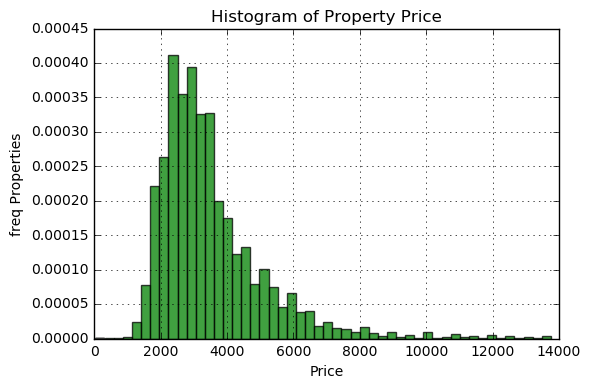

In [67]:
df_keep = df.copy()
df = (df[(df['price'] < mew + (4*sigma))]).copy()
df.reset_index(drop=True, inplace=True)

n, bins, patches = plt.hist(df['price'], 50, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Price')
plt.ylabel('freq Properties')
plt.title('Histogram of Property Price')
plt.grid(True)

plt.show()

<h3>A small aside</h3>

<p>We have now deleted wuite a bit of data to normalize our set a little more. I am happy with how nearly all of the ordinal numeric data is now being stored.</p>

<p>I also do realize that what I have done above is cutting out a huge amount of my data so I am making a second copy of the data that is not at all based on omiting those values outside of four standard deviations of the mean.</p>

In [68]:
df_keep.shape[0]

49302

In [69]:
df.shape[0]

48891

In [70]:
df.describe(include='all')

,created_month,created_day,created_hour,latitude,longitude,price,bathrooms,bedrooms,description_length,num_photos,highlights_str,keywords_str,interest_level
count,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,45684,45018,48891
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10094,2103,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Pre-War,Dogs Allowed,Cats Allowed","dogs,allowed,cats",low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1396,2042,33835
mean,5.014829,15.206112,4.762799,40.750865,-73.972452,3529.716083,1.195496,1.526620,599.614939,5.595365,NaN,NaN,NaN
std,0.824560,8.276489,4.190211,0.039535,0.029765,1643.520789,0.459262,1.103816,391.234592,3.623609,NaN,NaN,NaN
min,4.000000,1.000000,0.000000,40.506500,-74.243200,43.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,4.000000,8.000000,2.000000,40.728200,-73.991700,2495.000000,1.000000,1.000000,339.000000,4.000000,NaN,NaN,NaN
50%,5.000000,15.000000,3.000000,40.751700,-73.977900,3125.000000,1.000000,1.000000,562.000000,5.000000,NaN,NaN,NaN
75%,6.000000,22.000000,5.000000,40.774100,-73.954800,4050.000000,1.000000,2.000000,806.000000,7.000000,NaN,NaN,NaN


In [71]:
def clean(col):
    #Fill all the missing values with ?
    df[col].fillna('?', inplace=True)
    df[df[col] == '?']
    unique_words = []
    for highlight in df[col]:
        terms = [x.strip() for x in highlight.split(',')]
        for i in terms:
            if i not in unique_words:
                unique_words.append(i)
    return unique_words

In [72]:
clean_keys = clean('keywords_str')
clean_highs = clean('highlights_str')
print(len(clean_keys),":", len(clean_highs))

21 : 1545


<p>We can see that there isn't much point in using the highlight string. There would be a lot of data manipulation that we would have to go through to get to a point at which we could use the data. I am going to drop this column</p>

In [73]:
df.drop('highlights_str', axis=1, inplace = True)

<p>If we are able to create some kind of scoring with the 21 key words then we can probably use this score in our final AI</p>

In [74]:
print(clean_keys)

['?', 'dogs', 'allowed', 'cats', 'center', 'fitness', 'elevator', 'doorman', 'floors', 'hardwood', 'dishwasher', 'building', 'laundry', 'fee', 'war', 'pre', 'space', 'outdoor', 'unit', 'deck', 'roof']


In [75]:
#Get rid of some rubbish

for x in ['?', 'allowed', 'floors', 'building', 'war', 'space', 'unit']:
    clean_keys.remove(x)

In [76]:
print(clean_keys)

['dogs', 'cats', 'center', 'fitness', 'elevator', 'doorman', 'hardwood', 'dishwasher', 'laundry', 'fee', 'pre', 'outdoor', 'deck', 'roof']


In [77]:
df[df['keywords_str'] == '?'].shape[0]

3873

In [78]:
df['keywords_str'].replace('?',0, inplace=True)

In [79]:
df[df['keywords_str'] == 0].shape[0]

3873

In [80]:
#Little loop that will score a property based on the richness of features included.

for entry in df['keywords_str']:
    if isinstance(entry, str):
        count = 0 
        for word in clean_keys:
            if word in entry:
                count += 1
        df['keywords_str'].replace(entry,count, inplace=True)

In [81]:
df.keywords_str.unique()

array([ 0,  6,  3,  2,  1,  5,  7,  4,  8, 10, 11,  9, 14, 13, 12])

<p>to get a better idea of how the final two untouched columns will effect my data, I will replace all of the values in the interest column with some integer value and then plot these values on a graph to see correlation</p>

In [82]:
df.replace({'interest_level' : {'low' : 0, 'medium' : 1, 'high' : 2}}, inplace=True)

<p>Now I will plot the following to see any correlation.</p>
<ul>
<li>
num_photos vs interest
</li>
<li>
description_length vs interest
</li>
</ul>

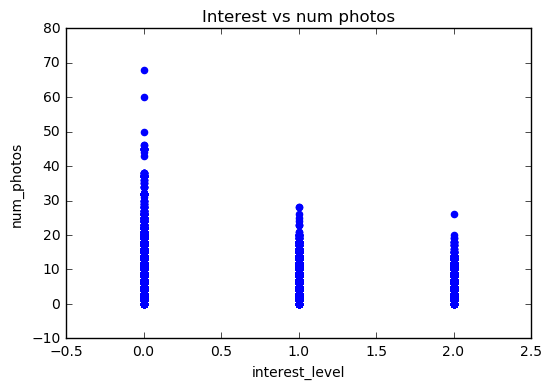

In [83]:
plot('interest_level','num_photos',"Interest vs num photos",'blue')

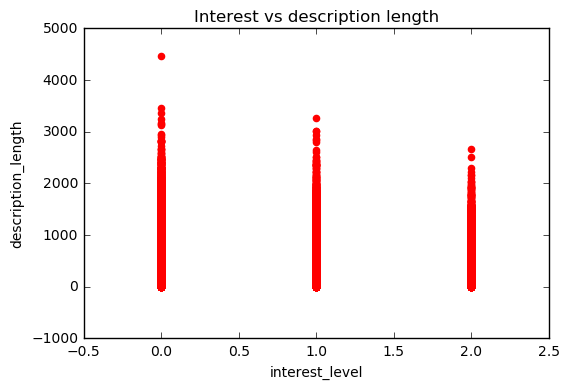

In [84]:
plot('interest_level','description_length',"Interest vs description length",'red')

<p>It doesn't appear that there is a huge correlation between the interest level and either the number of photos or the description length. We may as well leave the in to allow the feature engineering to take care of any of the slightly less effective data.</p>

<h4>Let's have a look at our data now</h4>

In [85]:
df.describe(include='all')

,created_month,created_day,created_hour,latitude,longitude,price,bathrooms,bedrooms,description_length,num_photos,keywords_str,interest_level
count,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000,48891.000000
mean,5.014829,15.206112,4.762799,40.750865,-73.972452,3529.716083,1.195496,1.526620,599.614939,5.595365,4.798020,0.386411
std,0.824560,8.276489,4.190211,0.039535,0.029765,1643.520789,0.459262,1.103816,391.234592,3.623609,3.378794,0.627715
min,4.000000,1.000000,0.000000,40.506500,-74.243200,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,2.000000,40.728200,-73.991700,2495.000000,1.000000,1.000000,339.000000,4.000000,2.000000,0.000000
50%,5.000000,15.000000,3.000000,40.751700,-73.977900,3125.000000,1.000000,1.000000,562.000000,5.000000,4.000000,0.000000
75%,6.000000,22.000000,5.000000,40.774100,-73.954800,4050.000000,1.000000,2.000000,806.000000,7.000000,7.000000,1.000000
max,6.000000,31.000000,23.000000,40.989400,-73.700100,13750.000000,10.000000,8.000000,4466.000000,68.000000,14.000000,2.000000


In [100]:
#Now let's do some of the predictive stuff!

#The code is taking an awfully long time to run, 
#I think I'll try fitting for a smaller sample space

X = df.drop('interest_level', axis=1)
y = df['interest_level']

In [101]:
# DO NOT USE LEAVE ONE OUT

fold_of_k = 3
cross_of_val = 3

models = {}
sss = StratifiedShuffleSplit(test_size=0.3, random_state = np.random)

def compute_error(estimator, X, y, cv=StratifiedKFold(fold_of_k, shuffle=True) ):
    mse_test = cross_val_score(estimator, X, y, scoring='accuracy', cv=cv)
    return np.mean(mse_test)

def doErrorEstimation(models, X, y):
    print("ERRORS:")
    for model in models:
        error = compute_error(models[model], X, y, cv=sss)
        print("%s : %f" % (model, error))
    

def doPredictions(models, X, y, data):
    print("PREDICTION ON DATA: ")
    print(data)
    for model in models:
        models[model].fit(X, y)
        ans = models[model].predict(data)
        print("%s : %s" % (model, "Yes" if ans > 0 else "No"))

In [ ]:
models['logistic'] = Pipeline([
    ('standardize', StandardScaler()),
    ('estimator', LogisticRegressionCV())
])
models['logistic-l1'] = Pipeline([
    ('standardize', StandardScaler()),
    ('estimator', LogisticRegressionCV(Cs=[10,9,8,7,6,5,4,3,2,1], penalty="l1", solver="liblinear", cv=3))
])
models['logistic-l2'] = Pipeline([
    ('standardize', StandardScaler()),
    ('estimator', LogisticRegressionCV(Cs=[10,9,8,7,6,5,4,3,2,1], penalty="l2", cv=3))
])

knn = Pipeline([
    ('standardize', StandardScaler()),
    ('estimator', KNeighborsClassifier())
])
knn_hyperparameters = {'estimator__n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
knn_gs = GridSearchCV(knn, knn_hyperparameters, scoring='accuracy', cv=3)
models['knn'] = knn_gs

doErrorEstimation(models, X, y)
print("..")


ERRORS:


<p>As we can see, the winner of the error estimation is KNN So we will go ahead and fit based on this information</p>


In [99]:
X = df.drop('interest_level', axis=1)
y = df['interest_level']
estimator = KNeighborsRegressor()
gs.fit(X, y)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10,
            random_state=<module 'numpy.random' from '/usr/local/lib/python3.4/dist-packages/numpy/random/__init__.py'>,
            test_size=0.3, train_size=None),
       error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

<p>In the initial dataset, we have low interest at 34284 out of 49352, which is roughly 0.69%. This essentially means if I were to classify everything as being a low interest that I would perform in and around the sae as my AI. In summation, it is totally useless in every aspect and takes a long time to run</p>